In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skewnorm
import statsmodels.api as sm 
from sklearn.preprocessing import StandardScaler


In [3]:
df = pd.read_csv('../dados/desafio_01_preco_imoveis.csv')
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045


1 - Analise a correlação de todas as variáveis com o preço do imóvel. Quais
variáveis são mais correlacionadas? Quais são menos correlacionadas?


In [4]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500


In [5]:
corr['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

2 - Para as top 5 variáveis mais correlacionadas com o preço:
1. plote as suas distribuições (histograma e boxplot)
2. plote o scatterplot (gráfico de dispersão), contendo preço no eixo Y e a
variável correlacionada no eixo X.



Text(0.5, 1.0, 'Boxplt sqft_living')

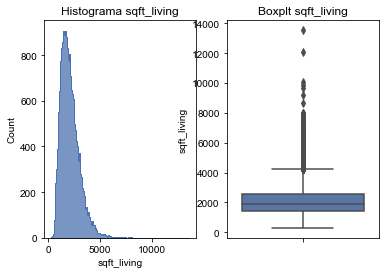

In [6]:
fig, ax = plt.subplots(1,2)
sns.set(rc={'figure.figsize':(11.7, 8.27)})
sns.histplot(data=df, x="sqft_living", element="step", ax = ax[0]).set_title("Histograma sqft_living")
sns.boxplot(y="sqft_living", data=df, ax=ax[1]).set_title("Boxplt sqft_living")

Text(0.5, 1.0, 'Boxplt grade')

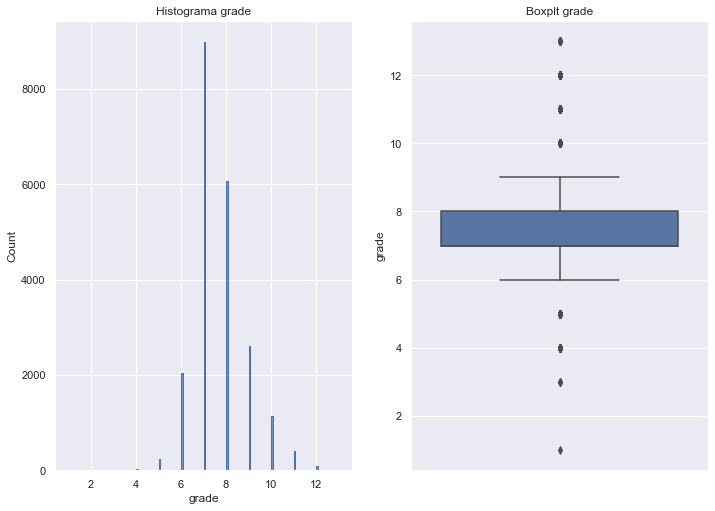

In [7]:
fig, ax = plt.subplots(1,2)
sns.set(rc={'figure.figsize':(11.7, 8.27)})
sns.histplot(data=df, x="grade", element="step", ax = ax[0]).set_title("Histograma grade")
sns.boxplot(y="grade", data=df, ax=ax[1]).set_title("Boxplt grade")

Text(0.5, 1.0, 'Boxplt sqft_above')

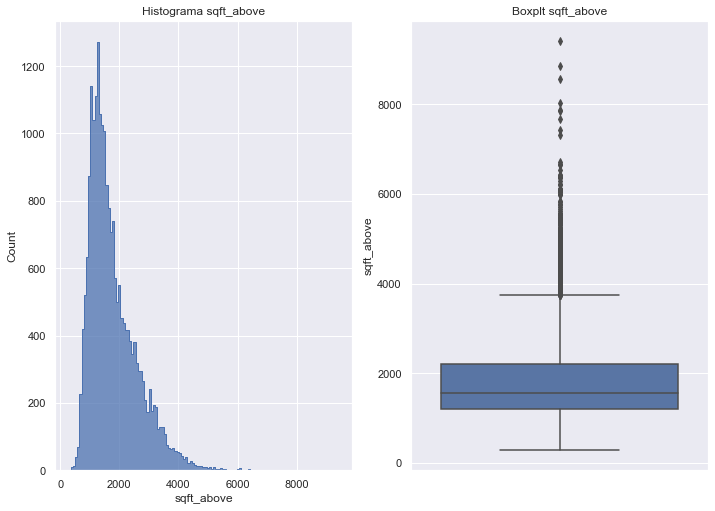

In [8]:
fig, ax = plt.subplots(1,2)
sns.set(rc={'figure.figsize':(11.7, 8.27)})
sns.histplot(data=df, x="sqft_above", element="step", ax = ax[0]).set_title("Histograma sqft_above")
sns.boxplot(y="sqft_above", data=df, ax=ax[1]).set_title("Boxplt sqft_above")

Text(0.5, 1.0, 'Boxplt view')

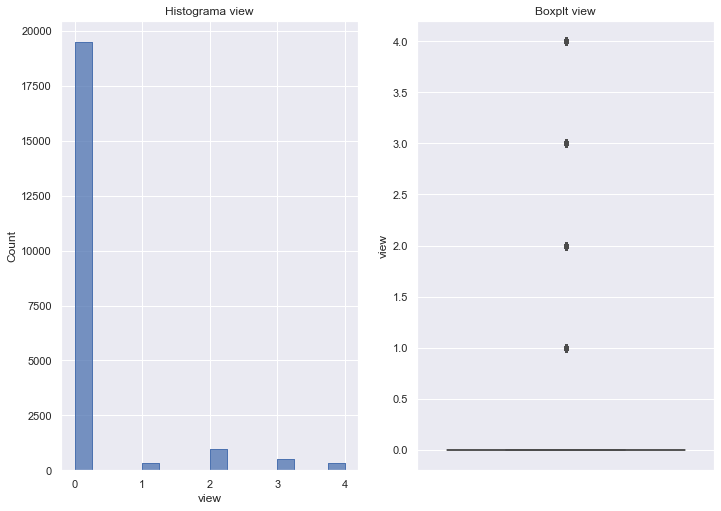

In [9]:
fig, ax = plt.subplots(1,2)
sns.set(rc={'figure.figsize':(11.7, 8.27)})
sns.histplot(data=df, x="view", element="step", ax = ax[0]).set_title("Histograma view")
sns.boxplot(y="view", data=df, ax=ax[1]).set_title("Boxplt view")

Text(0.5, 1.0, 'Boxplt proce')

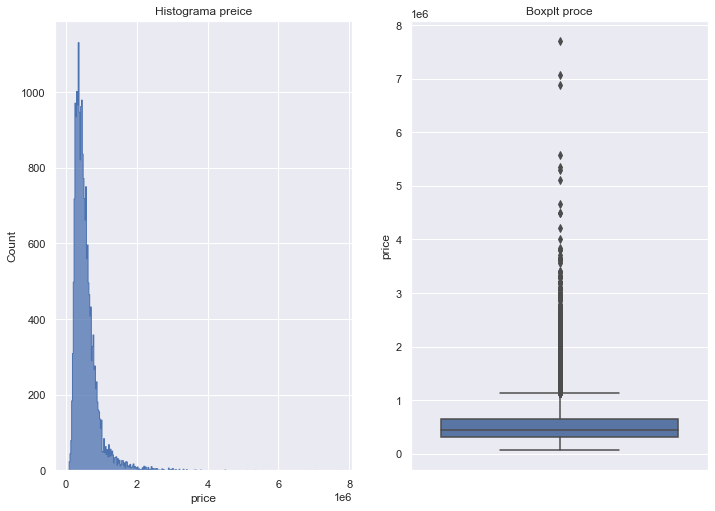

In [10]:
fig, ax = plt.subplots(1,2)
sns.set(rc={'figure.figsize':(11.7, 8.27)})
sns.histplot(data=df, x="price", element="step", ax = ax[0]).set_title("Histograma preice")
sns.boxplot(y="price", data=df, ax=ax[1]).set_title("Boxplt proce")

2. plote o scatterplot (gráfico de dispersão), contendo preço no eixo Y e a
variável correlacionada no eixo X.

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

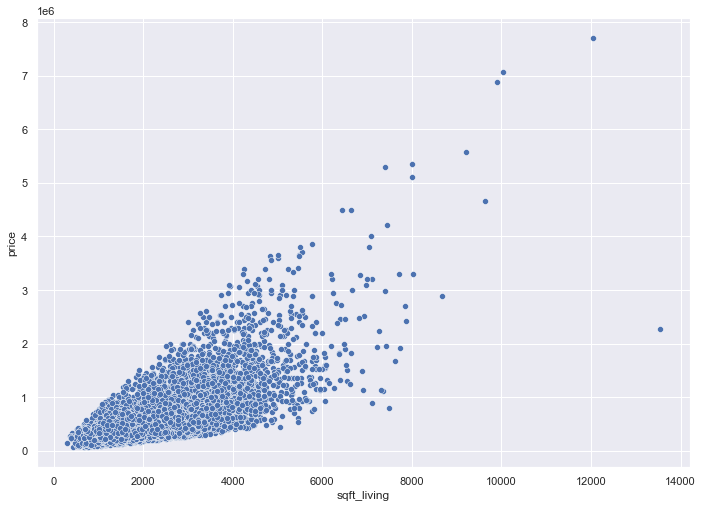

In [11]:
sns.scatterplot(data=df, x="sqft_living", y="price")

<AxesSubplot:xlabel='grade', ylabel='price'>

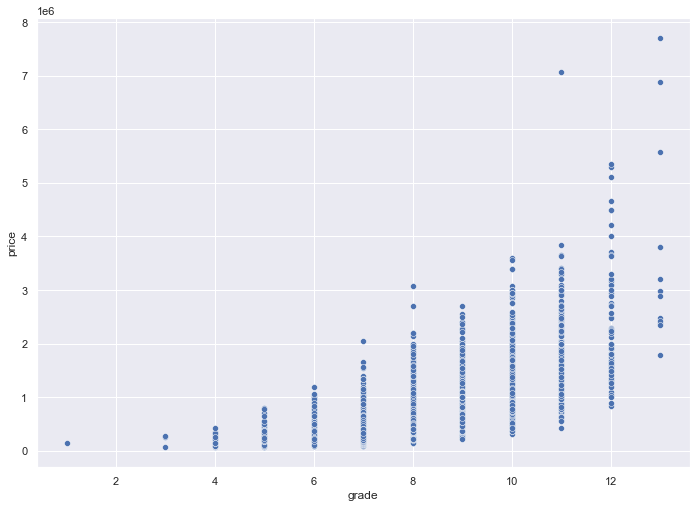

In [12]:
sns.scatterplot(data=df, x="grade", y="price")

<AxesSubplot:xlabel='sqft_above', ylabel='price'>

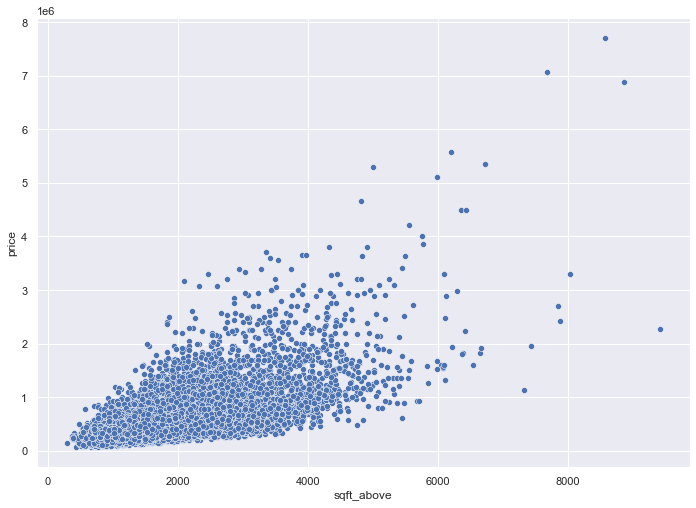

In [13]:
sns.scatterplot(data=df, x="sqft_above", y="price")

<AxesSubplot:xlabel='view', ylabel='price'>

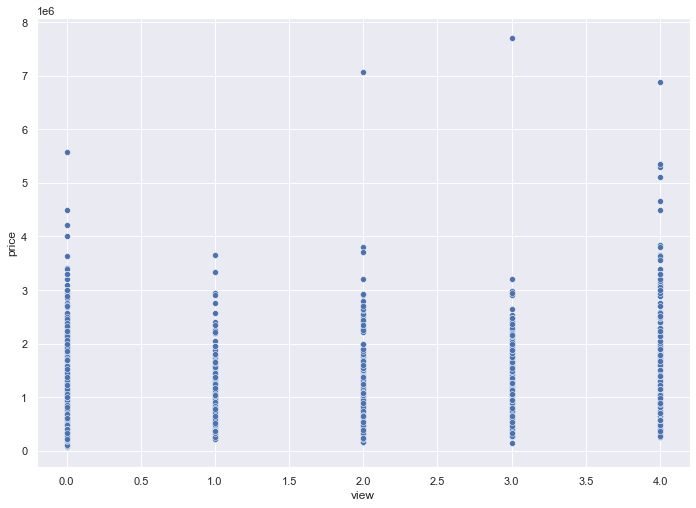

In [14]:
sns.scatterplot(data=df, x="view", y="price")

3. para cada uma das 5 variáveis faça uma regressão linear simples sendo
preciso a variável resposta (y) e interprete os resultados.

In [16]:
Y= df['price']

In [18]:
def calculate_regression(df,Y, X_name="bathrooms", const = True, normalize = True, logscale = False):
    if (normalize == True):
        scaler = StandardScaler()
        df_scale = pd. DataFrame(scaler.fit_transform(df[[ "price" ,X_name]]),columns = ["price" ,X_name])
        Y= df_scale["price"]
        X = df_scale[X_name]
    else:
        X = df[X_name]
    if (logscale == True):
        Y = np.log(df["price"])
        X = np.log(df[X_name])
    if (const == True):
        X = sm.add_constant(X)
    model = sm. OLS(Y,X)
    results = model.fit()
    print (results.summary())
    return results 

In [21]:
reg = calculate_regression(df,Y, X_name ="sqft_living", const = True, normalize= False)
reg

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Fri, 18 Mar 2022   Prob (F-statistic):               0.00
Time:                        20:36:55   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.358e+04   4402.690     -9.899      

In [22]:
reg = calculate_regression(df,Y, X_name ="sqft_living", const = True, normalize= True, logscale= False)
reg

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Fri, 18 Mar 2022   Prob (F-statistic):               0.00
Time:                        20:38:04   Log-Likelihood:                -23330.
No. Observations:               21613   AIC:                         4.666e+04
Df Residuals:                   21611   BIC:                         4.668e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2.776e-17      0.005  -5.73e-15      

In [23]:
def plot_regression(X,Y, reg):
    plt.scatter(X,Y)

    plt.plot(X, X * reg.params[1]+reg.params[0])
    plt.show()

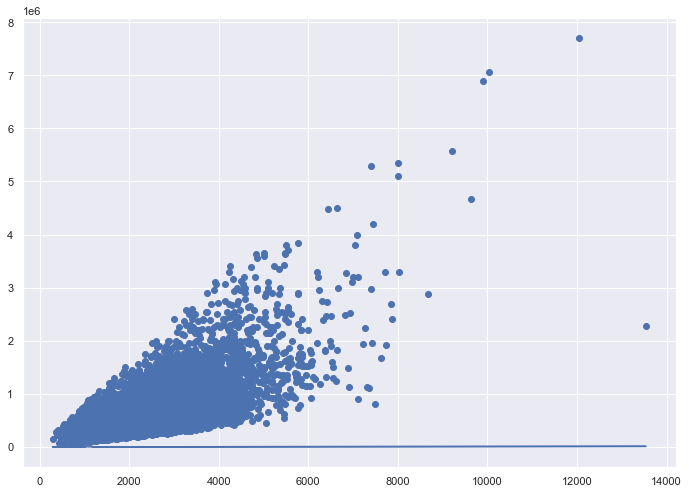

In [24]:
plot_regression(df["sqft_living"], Y, reg)

In [26]:
reg = calculate_regression(df,Y, X_name ="grade", const = True, normalize= False)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                 1.736e+04
Date:                Fri, 18 Mar 2022   Prob (F-statistic):               0.00
Time:                        20:41:38   Log-Likelihood:            -3.0123e+05
No. Observations:               21613   AIC:                         6.025e+05
Df Residuals:                   21611   BIC:                         6.025e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.056e+06   1.23e+04    -86.166      0.0

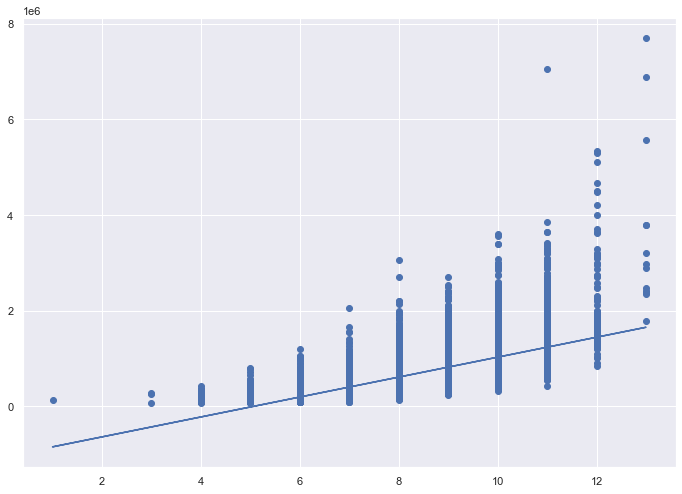

In [27]:
plot_regression(df["grade"], Y, reg)

In [28]:
reg = calculate_regression(df,Y, X_name ="sqft_above", const = True, normalize= False)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                 1.251e+04
Date:                Fri, 18 Mar 2022   Prob (F-statistic):               0.00
Time:                        20:42:24   Log-Likelihood:            -3.0267e+05
No. Observations:               21613   AIC:                         6.053e+05
Df Residuals:                   21611   BIC:                         6.054e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.995e+04   4729.812     12.676      0.0

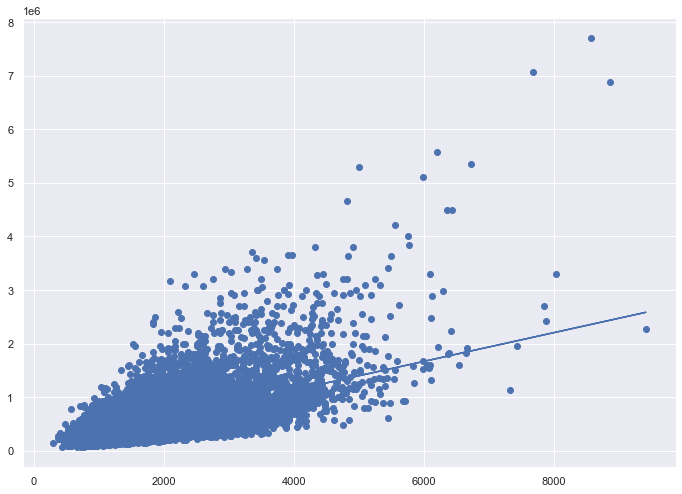

In [29]:
plot_regression(df["sqft_above"], Y, reg)

In [30]:
reg = calculate_regression(df,Y, X_name ="bathrooms", const = True, normalize= False)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     8229.
Date:                Fri, 18 Mar 2022   Prob (F-statistic):               0.00
Time:                        20:43:09   Log-Likelihood:            -3.0412e+05
No. Observations:               21613   AIC:                         6.082e+05
Df Residuals:                   21611   BIC:                         6.083e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.071e+04   6210.669      1.724      0.0

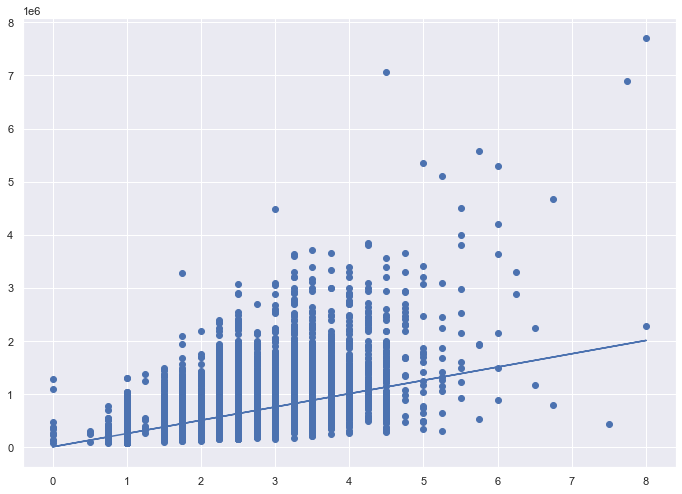

In [31]:
plot_regression(df["bathrooms"], Y, reg)

In [32]:
reg = calculate_regression(df,Y, X_name ="view", const = True, normalize= False)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     4050.
Date:                Fri, 18 Mar 2022   Prob (F-statistic):               0.00
Time:                        20:43:41   Log-Likelihood:            -3.0575e+05
No. Observations:               21613   AIC:                         6.115e+05
Df Residuals:                   21611   BIC:                         6.115e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.955e+05   2396.476    206.759      0.0

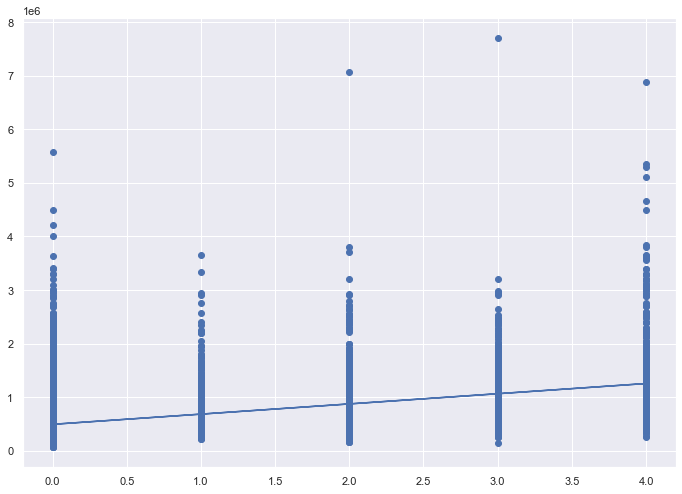

In [33]:
plot_regression(df["view"], Y, reg)